## JWST F770W Stephan's Quintet ERO

Data is setup in a subdirectory that is given in the filter variable below (i.e., "F560W"). Inside this directory, there should be 4 subdirectories called stage0, stage1, stage2, and stage3. The uncal (raw) fits files should be in the stage0 directory.

Author: Karl Gordon

Last modified: 3 Aug 2022

Based on JWebbinar notebooks by Bryan Hilbert, MIRI simulated notebooks by Mattia Libralato, input from various MIRI team members, and input from the jwst pipeline developers.

Uses custom code given in helpers subdirectory.

Extensively tested on MIRI ERO mosaics.

### Variables controling processing and display

In [1]:
filter = "F770W"
fwhm = 2.2
basename = "jw0273200"

crval = [338.9982251241355, 33.95839892526284]
# rotation = 63.0
# crval = None
rotation = None

# shifts determine from previous runs with treakreg or with other filters
#   analysis using Analyze_teakreg_shifts.ipynb
#   run this notebook after running shortest wavelength dataset with tweakreg=True and align_to_gaia=True
#     and setting all the tile?_shifts to [0.0, 0.0]
#   use the resulting shifts here and set tweakreg=False and align_to_gaia=False
#tile1_shifts = [0.0, 0.0]
#tile2_sfhits = [0.0, 0.0]
#tweakreg = True
#align_to_gaia = True
tile1_shifts = [-0.11869972000626429, -0.13548076355522468]
tile2_shifts = [0.1810914151833745, -0.11778119088380427]
tile3_shifts = [0.24783992350343395, -0.02284685457243522]
tile4_shifts = [-0.07174097028261477, -0.12693356035231074]
tweakreg = False
align_to_gaia = False

# only needed if multiple datasets combined that are taken separately (e.g., weeks apart)
matchbkg = True

# display range for uncalibrated images
drange_raw = [17., 50.]
# display range for calibrated images
drange_cal = [5., 40.]
dmap = "afmhot"  # same as ds9 bb

# specify the linearity file to use if default not desired
# linfile = ""
linfile = None

# specify the flat file to use if default not desired
flatfile = None

run_detector1 = True
run_image2 = True
run_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image, overlay_catalog
from helpers.miri_helpers import miri_detector1, miri_image2, miri_image3
from helpers.miri_clean import fix_rateints_to_rate, shift_cal_wcs

In [7]:
import jwst
print(jwst.__version__)

1.6.2.dev4+g35d5e1d


In [8]:
import stcal
print(stcal.__version__)

1.0.1.dev2+g6262cda


In [9]:
# create stage directories if they do not exist
for k in range(4):
    cpath = f"./{filter}/stage{k}"
    if not os.path.exists(cpath):
        os.makedirs(cpath)

## CALWEBB_DETECTOR1

In [10]:
miri_uncal_files = glob.glob(f"./{filter}/stage0/*uncal.fits")
output_dir = f'./{filter}/stage1'
print(miri_uncal_files)

['./F770W/stage0/jw02732006001_02101_00004_mirimage_uncal.fits', './F770W/stage0/jw02732006001_02101_00002_mirimage_uncal.fits', './F770W/stage0/jw02732006001_02101_00007_mirimage_uncal.fits', './F770W/stage0/jw02732002002_02101_00001_mirimage_uncal.fits', './F770W/stage0/jw02732002001_02101_00004_mirimage_uncal.fits', './F770W/stage0/jw02732002001_02101_00007_mirimage_uncal.fits', './F770W/stage0/jw02732006002_02101_00002_mirimage_uncal.fits', './F770W/stage0/jw02732006001_02101_00001_mirimage_uncal.fits', './F770W/stage0/jw02732002001_02101_00002_mirimage_uncal.fits', './F770W/stage0/jw02732006002_02101_00003_mirimage_uncal.fits', './F770W/stage0/jw02732002002_02101_00006_mirimage_uncal.fits', './F770W/stage0/jw02732002002_02101_00002_mirimage_uncal.fits', './F770W/stage0/jw02732006002_02101_00008_mirimage_uncal.fits', './F770W/stage0/jw02732002001_02101_00001_mirimage_uncal.fits', './F770W/stage0/jw02732006002_02101_00004_mirimage_uncal.fits', './F770W/stage0/jw02732006001_02101_000

In [11]:
if run_detector1:
    miri_detector1(miri_uncal_files, output_dir, linfile=linfile)

2022-08-03 12:40:07,787 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-08-03 12:40:07,788 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-03 12:40:07,788 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-08-03 12:40:07,789 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-08-03 12:40:07,789 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-08-03 12:40:07,790 - stpipe 

./F770W/stage0/jw02732006001_02101_00004_mirimage_uncal.fits


2022-08-03 12:40:07,890 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file': 

2022-08-03 12:40:14,077 - stpipe.Detector1Pipeline - INFO - Prefetch for READNOISE reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_readnoise_0057.fits'.
2022-08-03 12:40:14,078 - stpipe.Detector1Pipeline - INFO - Prefetch for REFPIX reference file is 'N/A'.
2022-08-03 12:40:14,079 - stpipe.Detector1Pipeline - INFO - Prefetch for RESET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_reset_0070.fits'.
2022-08-03 12:40:14,080 - stpipe.Detector1Pipeline - INFO - Prefetch for RSCD reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_rscd_0017.fits'.
2022-08-03 12:40:14,081 - stpipe.Detector1Pipeline - INFO - Prefetch for SATURATION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_saturation_0027.fits'.
2022-08-03 12:40:14,083 - stpipe.Detector1Pipeline - INFO - Prefetch for SUPERBIAS reference file is 'N/A'.
2022-08-03 12:40:14,083 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPDENSIT

2022-08-03 12:40:23,118 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd done
2022-08-03 12:40:23,250 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current running with args (<RampModel(1, 60, 1024, 1032) from jw02732006001_02101_00004_mirimage_uncal.fits>,).
2022-08-03 12:40:23,252 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F770W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0', 'dark_output': None}
2022-08-03 12:40:23,271 - stpipe.Detector1Pipeline.dark_current - INFO - Using DARK reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits
2022-08-03 12:40:46,573 - stpipe.Detector1Pipeline.dark_current - INFO - Science data nints=1, ngroups=60, nframes=1, groupgap=0
2022-08-03 12:40:46,

2022-08-03 12:40:51,609 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4589 pixels with at least one CR from five groups.
2022-08-03 12:40:51,610 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:40:51,611 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:40:51,731 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:40:51,740 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4364 pixels with at least one CR from five groups.
2022-08-03 12:40:51,741 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-08-03 12:40:5

2022-08-03 12:41:18,352 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-08-03 12:41:18,353 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-08-03 12:41:18,357 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done
2022-08-03 12:41:18,448 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<CubeModel(1, 1024, 1032) from jw02732006001_02101_00004_mirimage_uncal.fits>,).
2022-08-03 12:41:18,449 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scaleints', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:41:18,487 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-08-03 12:41:18,48

2022-08-03 12:41:19,359 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-08-03 12:41:19,360 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'int_name': '', 'save_opt': False, 'opt_name': '', 'suppress_one_group': True, 'maximum_cores': 'none', 'override_readnoise': None, 'override_gain': None, 'class': ''}


2022-08-03 12:41:19,361 - stpipe.Detector1Pipeline.ramp_fit - INFO - RampFitStep instance created.
2022-08-03 12:41:19,361 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_gain': None, 

./F770W/stage0/jw02732006001_02101_00002_mirimage_uncal.fits


2022-08-03 12:41:21,718 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02101_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:41:21,724 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:41:21,726 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:41:21,727 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:41:21,728 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:41:27,981 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:41:28,001 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:41:28,712 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:41:28,836 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006001_02101_00002_mirimage_uncal.fits>,).
2022-08-03 12:41:28,837 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:41:36,257 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5145 pixels with at least one CR from five groups.
2022-08-03 12:41:36,258 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-03 12:41:36,259 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:41:36,303 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:41:36,312 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5103 pixels with at least one CR from five groups.
2022-08-03 12:41:36,313 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:41:3

2022-08-03 12:41:59,922 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:41:59,924 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:42:00,418 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:42:00,420 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:42:01,194 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:42:01,196 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:42:01,673 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:42:01,675 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:42:01,824 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:42:01,945 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<I

2022-08-03 12:42:02,875 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-08-03 12:42:02,876 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 12:42:02,876 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:42:02,877 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02732006001_02101_00007_mirimage_uncal.fits


2022-08-03 12:42:06,259 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02101_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:42:06,263 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:42:06,264 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:42:06,265 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:42:06,266 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:42:12,486 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:42:12,507 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:42:13,187 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:42:13,316 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006001_02101_00007_mirimage_uncal.fits>,).
2022-08-03 12:42:13,317 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:42:20,586 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:42:20,595 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4561 pixels with at least one CR from five groups.
2022-08-03 12:42:20,596 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:42:20,597 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:42:20,653 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5195 pixels with at least one CR from five groups.
2022-08-03 12:42:20,654 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:42:2

2022-08-03 12:42:44,031 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:42:44,867 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:42:44,869 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:42:45,633 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:42:45,635 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:42:45,927 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:42:45,929 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:42:47,048 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:42:47,049 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:42:47,188 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12

2022-08-03 12:42:48,301 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-08-03 12:42:48,302 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 12:42:48,302 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:42:48,303 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02732002002_02101_00001_mirimage_uncal.fits


2022-08-03 12:42:51,917 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02101_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:42:51,922 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:42:51,924 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:42:51,925 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:42:51,926 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:42:58,096 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:42:58,115 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:42:58,818 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:42:58,943 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002002_02101_00001_mirimage_uncal.fits>,).
2022-08-03 12:42:58,944 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:43:06,346 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-08-03 12:43:06,383 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:43:06,397 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:43:06,406 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5379 pixels with at least one CR from five groups.
2022-08-03 12:43:06,407 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-08-03 12:43:06,408 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 12:43:06,487 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordo

2022-08-03 12:43:32,205 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:43:32,207 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:43:32,878 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:43:32,879 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:43:34,273 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:43:34,275 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:43:34,418 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:43:34,540 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002002_02101_00001_mirimage_uncal.fits>,).
2022-08-03 12:43:34,546 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-08-03 12:43:35,538 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:43:35,539 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:43:35,539 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 12:43:35,540 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02732002001_02101_00004_mirimage_uncal.fits


2022-08-03 12:43:37,889 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02101_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:43:37,892 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:43:37,893 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:43:37,894 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:43:37,895 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:43:44,465 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:43:44,485 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:43:45,195 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:43:45,322 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002001_02101_00004_mirimage_uncal.fits>,).
2022-08-03 12:43:45,323 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:43:52,770 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:43:52,778 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5813 pixels with at least one CR from five groups.
2022-08-03 12:43:52,779 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5510 pixels with at least one CR from five groups.
2022-08-03 12:43:52,779 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:43:52,780 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:43:52,780 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:43:5

2022-08-03 12:44:17,517 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:44:17,519 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:44:17,695 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:44:17,697 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:44:18,121 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:44:18,122 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:44:18,829 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:44:18,831 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:44:18,975 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:44:19,084 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<I

2022-08-03 12:44:20,071 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-08-03 12:44:20,072 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 12:44:20,072 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:44:20,073 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02732002001_02101_00007_mirimage_uncal.fits


2022-08-03 12:44:24,571 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02101_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:44:24,575 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:44:24,577 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:44:24,578 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:44:24,579 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:44:30,620 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:44:30,639 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:44:31,331 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:44:31,458 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002001_02101_00007_mirimage_uncal.fits>,).
2022-08-03 12:44:31,459 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:44:38,894 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:44:38,903 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4727 pixels with at least one CR from five groups.
2022-08-03 12:44:38,904 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:44:38,905 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 12:44:38,910 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:44:39,028 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 12:45:04,848 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:45:04,850 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:45:05,881 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:45:05,882 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:45:06,028 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:45:06,142 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002001_02101_00007_mirimage_uncal.fits>,).
2022-08-03 12:45:06,145 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search

2022-08-03 12:45:07,144 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:45:07,145 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:45:07,146 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 12:45:07,146 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02732006002_02101_00002_mirimage_uncal.fits


2022-08-03 12:45:10,689 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02101_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:45:10,692 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:45:10,693 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:45:10,694 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:45:10,695 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:45:16,761 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:45:16,780 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:45:17,472 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:45:17,606 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006002_02101_00002_mirimage_uncal.fits>,).
2022-08-03 12:45:17,607 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:45:24,842 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:45:24,843 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:45:24,917 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:45:24,926 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4865 pixels with at least one CR from five groups.
2022-08-03 12:45:24,928 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:45:24,929 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 12:45:24,

2022-08-03 12:45:48,998 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:45:49,012 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:45:49,014 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:45:49,709 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:45:49,711 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:45:52,009 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:45:52,010 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:45:52,150 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:45:52,265 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006002_02101_00002_mirimage_uncal.fits>,).
2022-08-03 12:45:52,269 - stp

2022-08-03 12:45:53,251 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 12:45:53,252 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:45:53,253 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:45:53,253 - stpipe.Detector1Pipeline

./F770W/stage0/jw02732006001_02101_00001_mirimage_uncal.fits


2022-08-03 12:45:56,490 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02101_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:45:56,494 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:45:56,496 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:45:56,497 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:45:56,499 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:46:02,819 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:46:02,838 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:46:03,593 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:46:03,732 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006001_02101_00001_mirimage_uncal.fits>,).
2022-08-03 12:46:03,733 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:46:11,298 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:46:11,311 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4479 pixels with at least one CR from five groups.
2022-08-03 12:46:11,313 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-08-03 12:46:11,314 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 12:46:11,353 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:46:11,361 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4480 pixels with at least one CR from five groups.
2022-08-03 12:46:11,362 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-08-03 12:46:34,647 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:46:35,780 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:46:35,782 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:46:35,953 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:46:35,955 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:46:36,260 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:46:36,262 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:46:38,114 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:46:38,116 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:46:38,268 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12

2022-08-03 12:46:39,410 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-08-03 12:46:39,410 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 12:46:39,411 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:46:39,412 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02732002001_02101_00002_mirimage_uncal.fits


2022-08-03 12:46:42,889 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02101_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:46:42,892 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:46:42,893 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:46:42,894 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:46:42,895 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:46:48,869 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:46:48,888 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:46:49,574 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:46:49,684 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002001_02101_00002_mirimage_uncal.fits>,).
2022-08-03 12:46:49,686 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:46:56,841 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:46:56,877 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:46:56,896 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:46:56,905 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5206 pixels with at least one CR from five groups.
2022-08-03 12:46:56,906 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:46:56,907 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:46:56,978 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordo

2022-08-03 12:47:21,247 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:47:21,249 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:47:24,530 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:47:24,531 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:47:24,692 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:47:24,815 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002001_02101_00002_mirimage_uncal.fits>,).
2022-08-03 12:47:24,826 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search

2022-08-03 12:47:26,674 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:47:26,675 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:47:26,676 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 12:47:26,677 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02732006002_02101_00003_mirimage_uncal.fits


2022-08-03 12:47:29,905 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02101_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:47:29,908 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:47:29,909 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:47:29,910 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:47:29,912 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:47:35,918 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:47:35,938 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:47:36,634 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:47:36,749 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006002_02101_00003_mirimage_uncal.fits>,).
2022-08-03 12:47:36,750 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:47:43,977 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:47:44,061 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:47:44,069 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4533 pixels with at least one CR from five groups.
2022-08-03 12:47:44,071 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:47:44,072 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-08-03 12:47:44,105 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:47:44,144 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordo

2022-08-03 12:48:08,284 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:48:08,286 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:48:09,862 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:48:09,864 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:48:11,304 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:48:11,306 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:48:11,443 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:48:11,560 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006002_02101_00003_mirimage_uncal.fits>,).
2022-08-03 12:48:11,565 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-08-03 12:48:12,544 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:48:12,545 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:48:12,545 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 12:48:12,546 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02732002002_02101_00006_mirimage_uncal.fits


2022-08-03 12:48:15,922 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02101_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:48:15,926 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:48:15,927 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:48:15,928 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:48:15,929 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:48:22,012 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:48:22,031 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:48:22,734 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:48:22,857 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002002_02101_00006_mirimage_uncal.fits>,).
2022-08-03 12:48:22,858 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:48:30,163 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:48:30,231 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:48:30,240 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5350 pixels with at least one CR from five groups.
2022-08-03 12:48:30,241 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-03 12:48:30,242 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 12:48:30,329 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 12:48:53,761 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:48:53,762 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:48:53,923 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:48:54,045 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002002_02101_00006_mirimage_uncal.fits>,).
2022-08-03 12:48:54,049 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:48:54,086 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-08-03 12:48:54,086 - stpipe.Det

2022-08-03 12:48:55,071 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 12:48:55,071 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-08-03 12:48:55,072 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-08-03 12:48:55,073 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F770W/stage0/jw02732002002_02101_00002_mirimage_uncal.fits


2022-08-03 12:48:58,020 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02101_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:48:58,024 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:48:58,027 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:48:58,028 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:48:58,029 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:49:04,126 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:49:04,145 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:49:04,840 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:49:04,966 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002002_02101_00002_mirimage_uncal.fits>,).
2022-08-03 12:49:04,967 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:49:12,240 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:49:12,256 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:49:12,319 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:49:12,330 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5232 pixels with at least one CR from five groups.
2022-08-03 12:49:12,331 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:49:12,332 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 12:49:12,401 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordo

2022-08-03 12:49:35,144 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:49:35,146 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:49:35,645 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:49:35,647 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:49:36,227 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:49:36,229 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:49:36,368 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:49:36,493 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002002_02101_00002_mirimage_uncal.fits>,).
2022-08-03 12:49:36,496 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-08-03 12:49:37,496 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:49:37,497 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:49:37,497 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 12:49:37,498 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02732006002_02101_00008_mirimage_uncal.fits


2022-08-03 12:49:40,424 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02101_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:49:40,427 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:49:40,428 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:49:40,429 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:49:40,430 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:49:46,581 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:49:46,601 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:49:47,302 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:49:47,433 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006002_02101_00008_mirimage_uncal.fits>,).
2022-08-03 12:49:47,434 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:49:54,768 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:49:54,820 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:49:54,829 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5527 pixels with at least one CR from five groups.
2022-08-03 12:49:54,830 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:49:54,831 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-08-03 12:49:54,895 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 12:50:17,125 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:50:18,954 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:50:18,956 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:50:21,004 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:50:21,006 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:50:21,155 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:50:21,274 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006002_02101_00008_mirimage_uncal.fits>,).
2022-08-03 12:50:21,278 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-08-03 12:50:22,294 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:50:22,295 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:50:22,295 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 12:50:22,296 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02732002001_02101_00001_mirimage_uncal.fits


2022-08-03 12:50:25,585 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02101_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:50:25,589 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:50:25,595 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:50:25,596 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:50:25,598 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:50:31,825 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:50:31,844 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:50:32,551 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:50:32,685 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002001_02101_00001_mirimage_uncal.fits>,).
2022-08-03 12:50:32,687 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:50:40,037 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5336 pixels with at least one CR from five groups.
2022-08-03 12:50:40,038 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-08-03 12:50:40,105 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:50:40,121 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:50:40,130 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5496 pixels with at least one CR from five groups.
2022-08-03 12:50:40,131 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:50:40,132 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-08-03 12:51:03,746 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:51:03,748 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:51:03,774 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:51:03,776 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:51:04,569 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:51:04,571 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:51:04,639 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:51:04,641 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:51:04,793 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:51:04,915 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<I

2022-08-03 12:51:05,881 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-08-03 12:51:05,882 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 12:51:05,882 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:51:05,883 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02732006002_02101_00004_mirimage_uncal.fits


2022-08-03 12:51:08,120 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02101_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:51:08,123 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:51:08,124 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:51:08,125 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:51:08,125 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:51:14,343 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:51:14,362 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:51:15,100 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:51:15,234 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006002_02101_00004_mirimage_uncal.fits>,).
2022-08-03 12:51:15,235 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:51:22,613 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:51:22,614 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:51:22,691 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:51:22,700 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4609 pixels with at least one CR from five groups.
2022-08-03 12:51:22,701 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-08-03 12:51:22,702 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 12:51:22,

2022-08-03 12:51:44,133 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:51:44,301 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:51:44,303 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:51:45,260 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:51:45,262 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:51:47,609 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:51:47,611 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:51:47,758 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:51:47,879 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006002_02101_00004_mirimage_uncal.fits>,).
2022-08-03 12:51:47,883 - stp

2022-08-03 12:51:48,870 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 12:51:48,871 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:51:48,872 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:51:48,872 - stpipe.Detector1Pipeline

./F770W/stage0/jw02732006001_02101_00003_mirimage_uncal.fits


2022-08-03 12:51:51,776 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02101_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:51:51,779 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:51:51,781 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:51:51,782 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:51:51,783 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:51:58,075 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:51:58,094 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:51:58,778 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:51:58,913 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006001_02101_00003_mirimage_uncal.fits>,).
2022-08-03 12:51:58,914 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:52:06,151 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:52:06,175 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:52:06,238 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:52:06,247 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6330 pixels with at least one CR from five groups.
2022-08-03 12:52:06,248 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-08-03 12:52:06,249 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 12:52:06,300 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordo

2022-08-03 12:52:30,414 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:52:30,416 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:52:31,044 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:52:31,046 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:52:31,818 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:52:31,819 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:52:31,971 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:52:32,100 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006001_02101_00003_mirimage_uncal.fits>,).
2022-08-03 12:52:32,103 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-08-03 12:52:33,117 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:52:33,118 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:52:33,118 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 12:52:33,119 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02732006002_02101_00001_mirimage_uncal.fits


2022-08-03 12:52:37,449 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02101_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:52:37,453 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:52:37,454 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:52:37,455 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:52:37,456 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:52:43,776 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:52:43,796 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:52:44,488 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:52:44,627 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006002_02101_00001_mirimage_uncal.fits>,).
2022-08-03 12:52:44,628 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:52:51,921 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:52:51,998 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:52:52,010 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:52:52,019 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4792 pixels with at least one CR from five groups.
2022-08-03 12:52:52,020 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:52:52,021 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-08-03 12:52:52,085 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon

2022-08-03 12:53:14,831 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:53:14,833 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:53:14,856 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:53:14,858 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:53:17,978 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:53:17,980 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:53:18,127 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:53:18,252 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006002_02101_00001_mirimage_uncal.fits>,).
2022-08-03 12:53:18,255 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-08-03 12:53:19,233 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:53:19,234 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:53:19,234 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 12:53:19,235 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02732002001_02101_00006_mirimage_uncal.fits


2022-08-03 12:53:22,619 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02101_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:53:22,623 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:53:22,624 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:53:22,626 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:53:22,627 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:53:28,793 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:53:28,812 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:53:29,536 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:53:29,672 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002001_02101_00006_mirimage_uncal.fits>,).
2022-08-03 12:53:29,673 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:53:36,936 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:53:37,004 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:53:37,026 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:53:37,034 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6102 pixels with at least one CR from five groups.
2022-08-03 12:53:37,036 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-08-03 12:53:37,037 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:53:37,102 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordo

2022-08-03 12:54:00,262 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:54:00,263 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:54:02,359 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:54:02,361 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:54:02,522 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:54:02,646 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002001_02101_00006_mirimage_uncal.fits>,).
2022-08-03 12:54:02,655 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search

2022-08-03 12:54:03,646 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:54:03,647 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:54:03,647 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 12:54:03,648 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02732006002_02101_00007_mirimage_uncal.fits


2022-08-03 12:54:05,693 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02101_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:54:05,696 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:54:05,697 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:54:05,698 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:54:05,698 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:54:11,915 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:54:11,934 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:54:12,621 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:54:12,756 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006002_02101_00007_mirimage_uncal.fits>,).
2022-08-03 12:54:12,757 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:54:19,995 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:54:19,997 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:54:20,071 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:54:20,080 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4660 pixels with at least one CR from five groups.
2022-08-03 12:54:20,081 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-08-03 12:54:20,083 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:54:20,139 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordo

2022-08-03 12:54:42,266 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:54:42,268 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:54:43,600 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:54:43,602 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:54:43,831 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:54:43,833 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:54:43,985 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:54:44,109 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006002_02101_00007_mirimage_uncal.fits>,).
2022-08-03 12:54:44,113 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-08-03 12:54:45,099 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:54:45,100 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:54:45,100 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 12:54:45,101 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02732002001_02101_00005_mirimage_uncal.fits


2022-08-03 12:54:48,170 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02101_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:54:48,173 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:54:48,175 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:54:48,176 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:54:48,177 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:54:54,344 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:54:54,363 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:54:55,048 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:54:55,182 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002001_02101_00005_mirimage_uncal.fits>,).
2022-08-03 12:54:55,184 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:55:02,696 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5958 pixels with at least one CR from five groups.
2022-08-03 12:55:02,697 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:55:02,698 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 12:55:02,704 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:55:02,792 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:55:02,800 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5909 pixels with at least one CR from five groups.
2022-08-03 12:55:02,801 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-08-03 12:55:26,877 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:55:27,025 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:55:27,149 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002001_02101_00005_mirimage_uncal.fits>,).
2022-08-03 12:55:27,158 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:55:27,193 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-08-03 12:55:27,193 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2022-08-03 12:55:27,197 - stpipe.Detector1Pipeline

2022-08-03 12:55:28,129 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 12:55:28,130 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-08-03 12:55:28,130 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-08-03 12:55:28,131 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F770W/stage0/jw02732006002_02101_00005_mirimage_uncal.fits


2022-08-03 12:55:30,334 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02101_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:55:30,337 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:55:30,338 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:55:30,339 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:55:30,340 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:55:36,375 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:55:36,394 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:55:37,081 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:55:37,215 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006002_02101_00005_mirimage_uncal.fits>,).
2022-08-03 12:55:37,216 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:55:44,538 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:55:44,547 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:55:44,556 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4808 pixels with at least one CR from five groups.
2022-08-03 12:55:44,557 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-08-03 12:55:44,558 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 12:55:44,644 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 12:56:06,332 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:56:06,890 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:56:06,892 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:56:07,874 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:56:07,876 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:56:08,028 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:56:08,154 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006002_02101_00005_mirimage_uncal.fits>,).
2022-08-03 12:56:08,158 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-08-03 12:56:09,153 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:56:09,153 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:56:09,154 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 12:56:09,155 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02732002002_02101_00003_mirimage_uncal.fits


2022-08-03 12:56:12,394 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02101_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:56:12,397 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:56:12,400 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:56:12,400 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:56:12,402 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:56:18,536 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:56:18,555 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:56:19,245 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:56:19,379 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002002_02101_00003_mirimage_uncal.fits>,).
2022-08-03 12:56:19,380 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:56:26,604 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:56:26,605 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:56:26,736 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:56:26,745 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5542 pixels with at least one CR from five groups.
2022-08-03 12:56:26,746 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-03 12:56:26,747 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 12:56:26,

2022-08-03 12:56:49,566 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:56:49,940 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:56:49,941 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:56:50,647 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:56:50,649 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:56:50,868 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:56:50,870 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:56:51,030 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:56:51,156 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002002_02101_00003_mirimage_uncal.fits>,).
2022-08-03 12:56:51,159 - stp

2022-08-03 12:56:52,138 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 12:56:52,138 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:56:52,139 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:56:52,139 - stpipe.Detector1Pipeline

./F770W/stage0/jw02732006002_02101_00006_mirimage_uncal.fits


2022-08-03 12:56:54,572 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02101_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:56:54,576 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:56:54,577 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:56:54,578 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:56:54,579 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:57:01,058 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:57:01,078 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:57:01,858 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:57:02,019 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006002_02101_00006_mirimage_uncal.fits>,).
2022-08-03 12:57:02,020 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:57:09,695 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:57:09,696 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 12:57:09,861 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:57:09,869 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5206 pixels with at least one CR from five groups.
2022-08-03 12:57:09,870 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:57:09,871 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 12:57:09,

2022-08-03 12:57:32,988 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:57:33,222 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:57:33,224 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:57:33,493 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:57:33,495 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:57:37,682 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:57:37,684 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:57:37,841 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:57:37,975 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006002_02101_00006_mirimage_uncal.fits>,).
2022-08-03 12:57:37,979 - stp

2022-08-03 12:57:39,030 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 12:57:39,031 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:57:39,031 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:57:39,032 - stpipe.Detector1Pipeline

./F770W/stage0/jw02732006001_02101_00008_mirimage_uncal.fits


2022-08-03 12:57:42,179 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02101_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:57:42,182 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:57:42,184 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:57:42,184 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:57:42,186 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:57:48,481 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:57:48,500 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:57:49,208 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:57:49,364 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006001_02101_00008_mirimage_uncal.fits>,).
2022-08-03 12:57:49,365 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:57:57,007 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-03 12:57:57,008 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:57:57,105 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:57:57,117 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4405 pixels with at least one CR from five groups.
2022-08-03 12:57:57,118 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-08-03 12:57:57,119 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:57:57,

2022-08-03 12:58:19,935 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:58:20,012 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:58:20,013 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:58:20,691 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:58:20,693 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:58:23,576 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:58:23,578 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:58:23,756 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:58:23,894 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732006001_02101_00008_mirimage_uncal.fits>,).
2022-08-03 12:58:23,898 - stp

2022-08-03 12:58:24,884 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 12:58:24,885 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:58:24,885 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:58:24,886 - stpipe.Detector1Pipeline

./F770W/stage0/jw02732002002_02101_00007_mirimage_uncal.fits


2022-08-03 12:58:28,188 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02101_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:58:28,191 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:58:28,193 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:58:28,194 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:58:28,195 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:58:34,510 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:58:34,530 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:58:35,238 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:58:35,385 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002002_02101_00007_mirimage_uncal.fits>,).
2022-08-03 12:58:35,386 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:58:42,920 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 12:58:42,935 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:58:43,016 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:58:43,030 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5694 pixels with at least one CR from five groups.
2022-08-03 12:58:43,032 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 12:58:43,033 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 12:58:43,076 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordo

2022-08-03 12:59:05,980 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:59:05,982 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:59:08,379 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:59:08,381 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:59:08,547 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:59:08,685 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002002_02101_00007_mirimage_uncal.fits>,).
2022-08-03 12:59:08,689 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search

2022-08-03 12:59:09,707 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:59:09,708 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:59:09,708 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 12:59:09,709 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02732002002_02101_00005_mirimage_uncal.fits


2022-08-03 12:59:12,620 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02101_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:59:12,623 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:59:12,625 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:59:12,626 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:59:12,628 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 12:59:18,843 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 12:59:18,862 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 12:59:19,565 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 12:59:19,706 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002002_02101_00005_mirimage_uncal.fits>,).
2022-08-03 12:59:19,707 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 12:59:27,253 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 12:59:27,262 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5225 pixels with at least one CR from five groups.
2022-08-03 12:59:27,263 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-08-03 12:59:27,264 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 12:59:27,339 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 12:59:27,363 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 1

2022-08-03 12:59:48,671 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:59:49,083 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:59:49,085 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:59:50,551 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 12:59:50,553 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 12:59:50,709 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 12:59:50,842 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002002_02101_00005_mirimage_uncal.fits>,).
2022-08-03 12:59:50,846 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-08-03 12:59:51,815 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 12:59:51,815 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 12:59:51,816 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 12:59:51,817 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02732006001_02101_00006_mirimage_uncal.fits


2022-08-03 12:59:54,137 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02101_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 12:59:54,140 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 12:59:54,141 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 12:59:54,142 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 12:59:54,142 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 13:00:00,604 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 13:00:00,622 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 13:00:01,335 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 13:00:01,479 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006001_02101_00006_mirimage_uncal.fits>,).
2022-08-03 13:00:01,480 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 13:00:08,997 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4924 pixels with at least one CR from five groups.
2022-08-03 13:00:08,999 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-08-03 13:00:09,000 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 13:00:09,031 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 13:00:09,062 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 13:00:09,071 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5343 pixels with at least one CR from five groups.
2022-08-03 13:00:09,072 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-08-03 13:00:30,049 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:00:31,280 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:00:31,282 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:00:31,900 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:00:31,902 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:00:32,418 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:00:32,420 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:00:32,789 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:00:32,791 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:00:32,943 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 13

2022-08-03 13:00:34,137 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-08-03 13:00:34,138 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 13:00:34,138 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 13:00:34,139 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02732002002_02101_00008_mirimage_uncal.fits


2022-08-03 13:00:37,417 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02101_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 13:00:37,420 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 13:00:37,423 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 13:00:37,424 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 13:00:37,425 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 13:00:43,609 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 13:00:43,629 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 13:00:44,322 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 13:00:44,464 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002002_02101_00008_mirimage_uncal.fits>,).
2022-08-03 13:00:44,465 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 13:00:51,875 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 13:00:51,876 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-08-03 13:00:51,954 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 13:00:51,963 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5628 pixels with at least one CR from five groups.
2022-08-03 13:00:51,964 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 13:00:51,965 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 13:00:52,

2022-08-03 13:01:13,821 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:01:15,097 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:01:15,099 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:01:16,990 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:01:16,992 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:01:17,144 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 13:01:17,280 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002002_02101_00008_mirimage_uncal.fits>,).
2022-08-03 13:01:17,283 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-08-03 13:01:18,315 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 13:01:18,316 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 13:01:18,316 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 13:01:18,317 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02732002002_02101_00004_mirimage_uncal.fits


2022-08-03 13:01:21,491 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02101_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 13:01:21,494 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 13:01:21,502 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 13:01:21,508 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 13:01:21,510 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 13:01:27,951 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 13:01:27,971 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 13:01:28,693 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 13:01:28,837 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002002_02101_00004_mirimage_uncal.fits>,).
2022-08-03 13:01:28,838 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 13:01:36,199 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4853 pixels with at least one CR from five groups.
2022-08-03 13:01:36,200 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 13:01:36,201 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 13:01:36,271 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 13:01:36,280 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5537 pixels with at least one CR from five groups.
2022-08-03 13:01:36,281 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-08-03 13:01:3

2022-08-03 13:01:59,297 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:01:59,299 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:01:59,386 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:01:59,387 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:01:59,665 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:01:59,667 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:02:00,458 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:02:00,460 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:02:00,627 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 13:02:00,772 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<I

2022-08-03 13:02:01,786 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-08-03 13:02:01,786 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 13:02:01,787 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 13:02:01,788 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02732002001_02101_00008_mirimage_uncal.fits


2022-08-03 13:02:04,826 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02101_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 13:02:04,829 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 13:02:04,831 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 13:02:04,832 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 13:02:04,833 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 13:02:11,414 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 13:02:11,436 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 13:02:12,207 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 13:02:12,367 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002001_02101_00008_mirimage_uncal.fits>,).
2022-08-03 13:02:12,368 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 13:02:20,065 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 13:02:20,126 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 13:02:20,145 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 13:02:20,155 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5367 pixels with at least one CR from five groups.
2022-08-03 13:02:20,156 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 13:02:20,157 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-08-03 13:02:20,236 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordo

2022-08-03 13:02:44,302 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:02:44,304 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:02:44,876 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:02:44,878 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:02:45,120 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:02:45,122 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:02:45,296 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 13:02:45,449 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002001_02101_00008_mirimage_uncal.fits>,).
2022-08-03 13:02:45,452 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-08-03 13:02:46,476 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 13:02:46,477 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-08-03 13:02:46,477 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-08-03 13:02:46,478 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F770W/stage0/jw02732006001_02101_00005_mirimage_uncal.fits


2022-08-03 13:02:50,163 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006001_02101_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 13:02:50,166 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 13:02:50,167 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 13:02:50,168 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 13:02:50,169 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 13:02:56,824 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 13:02:56,844 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 13:02:57,596 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 13:02:57,758 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732006001_02101_00005_mirimage_uncal.fits>,).
2022-08-03 13:02:57,759 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 13:03:05,756 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 13:03:05,767 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4715 pixels with at least one CR from five groups.
2022-08-03 13:03:05,768 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 13:03:05,769 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 13:03:05,772 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4483 pixels with at least one CR from five groups.
2022-08-03 13:03:05,774 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 13:03:0

2022-08-03 13:03:29,937 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:03:29,939 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:03:30,726 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:03:30,728 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:03:30,884 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:03:30,886 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:03:32,652 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:03:32,654 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:03:32,829 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 13:03:32,982 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<I

2022-08-03 13:03:34,011 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-08-03 13:03:34,012 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-08-03 13:03:34,012 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-08-03 13:03:34,013 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F770W/stage0/jw02732002001_02101_00003_mirimage_uncal.fits


2022-08-03 13:03:37,081 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002001_02101_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-08-03 13:03:37,084 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-08-03 13:03:37,086 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-08-03 13:03:37,087 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-08-03 13:03:37,088 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-08-03 13:03:43,894 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F770W/stage0'}
2022-08-03 13:03:43,913 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-08-03 13:03:44,641 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-08-03 13:03:44,803 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 60, 1024, 1032) from jw02732002001_02101_00003_mirimage_uncal.fits>,).
2022-08-03 13:03:44,804 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-08-03 13:03:52,454 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-08-03 13:03:52,512 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-08-03 13:03:52,534 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-08-03 13:03:52,543 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5130 pixels with at least one CR from five groups.
2022-08-03 13:03:52,544 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-08-03 13:03:52,546 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-08-03 13:03:52,613 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordo

2022-08-03 13:04:16,542 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:04:16,545 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:04:17,877 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 58
2022-08-03 13:04:17,879 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-08-03 13:04:18,054 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-08-03 13:04:18,208 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02732002001_02101_00003_mirimage_uncal.fits>,).
2022-08-03 13:04:18,211 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search

In [12]:
# fix the making of the rate images from the rateints images
#   needed for multiple integrations in regions near saturation
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_rate.fits")
for cfile in miri_rate_files:
    fix_rateints_to_rate(cfile)

In [13]:
# look at one of the images
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
miri_rate = datamodels.open(miri_rate_files[0])
drange = drange_raw

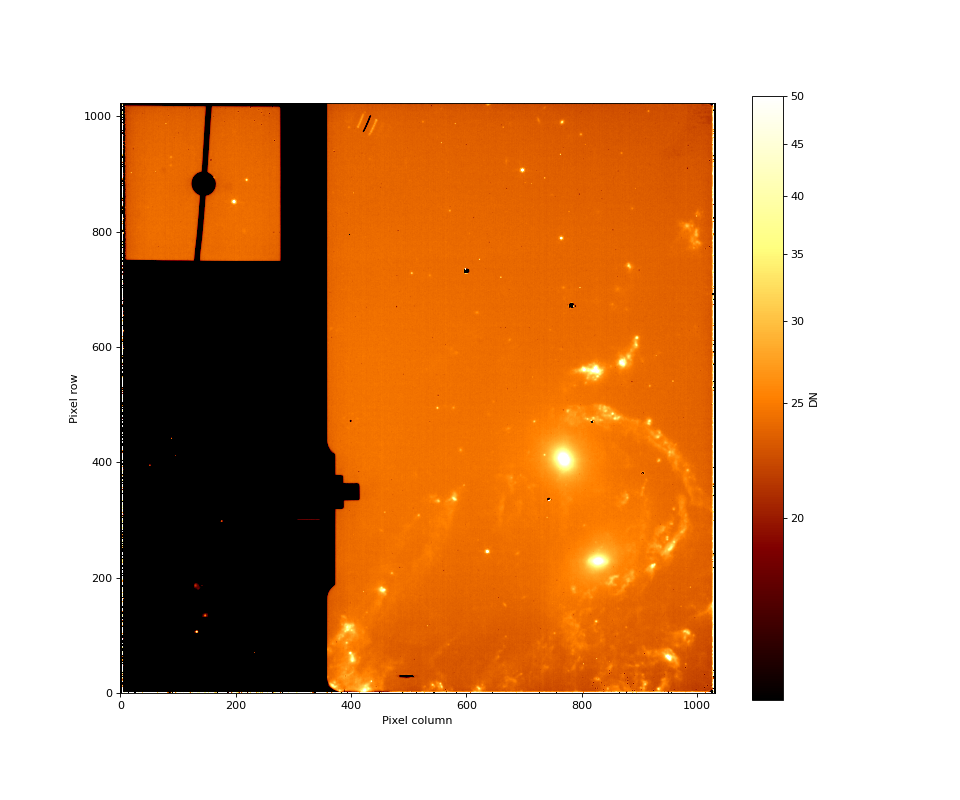

In [14]:
show_image(miri_rate.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

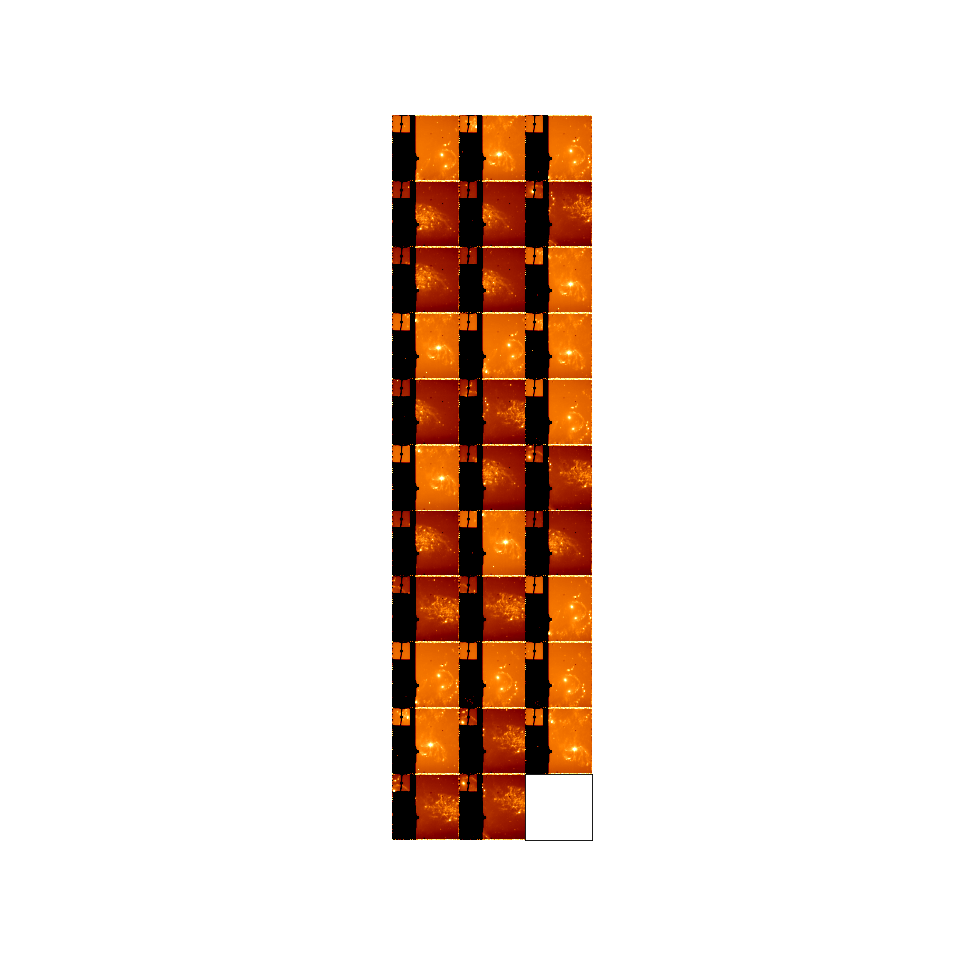

In [15]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_rate_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_rate_files):
    with datamodels.open(cfile) as miri_rate:
        cimage = miri_rate.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE2

In [16]:
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
output_dir = f'./{filter}/stage2'
print(miri_rate_files)

['./F770W/stage1/jw02732002001_02101_00005_mirimage_fixed_rate.fits', './F770W/stage1/jw02732002002_02101_00006_mirimage_fixed_rate.fits', './F770W/stage1/jw02732002001_02101_00002_mirimage_fixed_rate.fits', './F770W/stage1/jw02732006001_02101_00005_mirimage_fixed_rate.fits', './F770W/stage1/jw02732006001_02101_00006_mirimage_fixed_rate.fits', './F770W/stage1/jw02732006002_02101_00004_mirimage_fixed_rate.fits', './F770W/stage1/jw02732006001_02101_00008_mirimage_fixed_rate.fits', './F770W/stage1/jw02732006001_02101_00001_mirimage_fixed_rate.fits', './F770W/stage1/jw02732002002_02101_00002_mirimage_fixed_rate.fits', './F770W/stage1/jw02732002002_02101_00008_mirimage_fixed_rate.fits', './F770W/stage1/jw02732002001_02101_00004_mirimage_fixed_rate.fits', './F770W/stage1/jw02732002002_02101_00001_mirimage_fixed_rate.fits', './F770W/stage1/jw02732006001_02101_00007_mirimage_fixed_rate.fits', './F770W/stage1/jw02732006002_02101_00005_mirimage_fixed_rate.fits', './F770W/stage1/jw02732002001_021

In [17]:
if run_image2:
    miri_image2(miri_rate_files, output_dir, flatfile=flatfile)

2022-08-03 13:05:01,111 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2022-08-03 13:05:01,112 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_combined_background': False, 'sigma': 3.0, 'maxiters': None, 'wfss_mmag_extract': None, 'override_wfssbkg': None, 'override_wavelengthrange': None, 'class': ''}


2022-08-03 13:05:01,113 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2022-08-03 13:05:01,114 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'sip_approx': True, 's

2022-08-03 13:05:03,080 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-08-03 13:05:03,082 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-08-03 13:05:03,082 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-08-03 13:05:03,083 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-08-03 13:05:03,083 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-08-03 13:05:03,083 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-08-03 13:05:03,084 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-03 13:05:03,086 - stpipe.Image2Pipeline - INFO - Prefetch

2022-08-03 13:05:03,115 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-08-03 13:05:03,115 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-08-03 13:05:03,115 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-08-03 13:05:03,116 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-08-03 13:05:03,116 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-08-03 13:05:03,117 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-08-03 13:05:03,117 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-08-03 13:05:03,117 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-08-03 13:05:03,118 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw027320060

2022-08-03 13:05:03,148 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-08-03 13:05:03,149 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-03 13:05:03,150 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-08-03 13:05:03,150 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-08-03 13:05:03,151 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-08-03 13:05:03,152 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-08-03 13:05:03,152 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/

2022-08-03 13:05:03,178 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-08-03 13:05:03,179 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-08-03 13:05:03,179 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-08-03 13:05:03,179 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02732002002_02101_00002_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-08-03 13:05:03,182 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-08-03 13:05:03,183 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
202

2022-08-03 13:05:03,212 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-08-03 13:05:03,213 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-08-03 13:05:03,213 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-08-03 13:05:03,213 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-08-03 13:05:03,213 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-08-03 13:05:03,214 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-08-03 13:05:03,214 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-08-03 13:05:03,214 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-08-03 13:05:03,214 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/refe

2022-08-03 13:05:03,244 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-08-03 13:05:03,245 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-08-03 13:05:03,246 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-08-03 13:05:03,246 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-08-03 13:05:03,246 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-08-03 13:05:03,246 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-08-03 13:05:03,247 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-03 13:05:03,248 - stpipe.Image2Pipeline - INFO - Prefetch

2022-08-03 13:05:03,274 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-08-03 13:05:03,274 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-08-03 13:05:03,275 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-08-03 13:05:03,275 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-08-03 13:05:03,275 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-08-03 13:05:03,276 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-08-03 13:05:03,276 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-08-03 13:05:03,276 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-08-03 13:05:03,276 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw027320060

2022-08-03 13:05:03,310 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-08-03 13:05:03,311 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-03 13:05:03,311 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-08-03 13:05:03,312 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-08-03 13:05:03,312 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-08-03 13:05:03,313 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-08-03 13:05:03,313 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/

2022-08-03 13:05:03,342 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-08-03 13:05:03,342 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-08-03 13:05:03,342 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-08-03 13:05:03,343 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02732006002_02101_00006_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-08-03 13:05:03,346 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-08-03 13:05:03,347 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
202

2022-08-03 13:05:03,377 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-08-03 13:05:03,378 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-08-03 13:05:03,378 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-08-03 13:05:03,378 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-08-03 13:05:03,378 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-08-03 13:05:03,378 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-08-03 13:05:03,379 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-08-03 13:05:03,379 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-08-03 13:05:03,379 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/refe

2022-08-03 13:05:03,410 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-08-03 13:05:03,411 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-08-03 13:05:03,411 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-08-03 13:05:03,411 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-08-03 13:05:03,411 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-08-03 13:05:03,412 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-08-03 13:05:03,413 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-03 13:05:03,413 - stpipe.Image2Pipeline - INFO - Prefetch

2022-08-03 13:05:03,441 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-08-03 13:05:03,441 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-08-03 13:05:03,442 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-08-03 13:05:03,442 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-08-03 13:05:03,443 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-08-03 13:05:03,443 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-08-03 13:05:03,443 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-08-03 13:05:03,443 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-08-03 13:05:03,444 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw027320020

2022-08-03 13:05:03,473 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-08-03 13:05:03,474 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-03 13:05:03,474 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-08-03 13:05:03,474 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-08-03 13:05:03,475 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0785.fits'.
2022-08-03 13:05:03,476 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-08-03 13:05:03,476 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/

2022-08-03 13:05:06,898 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-08-03 13:05:07,200 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-08-03 13:05:07,691 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:05:08,024 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-08-03 13:05:08,514 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:05:08,853 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-08-03 13:05:09,342 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:05:09,681 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-03 13:05:10,174 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:05:10,523 - stpipe.Image2Pipeline.resample 

2022-08-03 13:05:15,675 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-03 13:05:16,176 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:05:16,533 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  339.020005269 33.998171320 338.985184629 33.985829270 339.000216235 33.956676815 339.035027117 33.969014633
2022-08-03 13:05:17,152 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F770W/stage2/jw02732002002_02101_00006_mirimage_fixed_i2d.fits
2022-08-03 13:05:17,153 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-08-03 13:05:17,153 - stpipe.Image2Pipeline - INFO - Finished processing product ./F770W/stage1/jw02732002002_02101_00006_mirimage_fixed
2022-08-03 13:05:17,155 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw02732002001_02101_00002_mirimage_fixed
2022-08-03 13:05:17,155 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw027320

2022-08-03 13:05:23,148 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw02732006001_02101_00005_mirimage_fixed
2022-08-03 13:05:23,148 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw02732006001_02101_00005_mirimage_fixed_rate.fits ...
2022-08-03 13:05:23,460 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02732006001_02101_00005_mirimage_fixed_rate.fits>,).
2022-08-03 13:05:23,462 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 

2022-08-03 13:05:29,685 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-08-03 13:05:29,780 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  339.021368518 33.964933528 338.990605844 33.946835805 339.012472516 33.921185261 339.043482570 33.939069933
2022-08-03 13:05:29,780 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  339.021368518 33.964933528 338.990605844 33.946835805 339.012472516 33.921185261 339.043482570 33.939069933
2022-08-03 13:05:29,781 - stpipe.Image2

2022-08-03 13:05:35,805 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  339.009690734 33.983788910 338.978931782 33.965678871 339.000818220 33.940037089 339.031824736 33.957934172
2022-08-03 13:05:35,805 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-08-03 13:05:35,920 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-08-03 13:05:36,184 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02732006002_02101_00004_mirimage_fixed_rate.fits>,).
2022-08-03 13:05:36,185 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-08-03 13:05:42,312 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 13:05:42,312 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 13:05:42,313 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 13:05:42,318 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 13:05:42,442 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-08-03 13:05:42,695 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732006001_02101_00008_mirimage_fixed_rate.fits>,).
2022-08-03 13:05:42,696 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-08-03 13:05:48,676 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732006001_02101_00001_mirimage_fixed_rate.fits>,).
2022-08-03 13:05:48,677 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-08-03 13:05:48,701 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-08-03 13:05:48,701 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-03 13:05:48,786 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-03 13:05:48

2022-08-03 13:05:54,800 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-03 13:05:54,885 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-03 13:05:54,885 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-08-03 13:05:54,885 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-08-03 13:05:54,886 - stpipe.Image2Pipeline.photom - INFO -  filter: F770W
2022-08-03 13:05:54,933 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-08-03 13:05:54,935 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-08-03 13:05:54,935 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-08-03 13:05:54,936 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-08-03 13:05:54,954 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-03 13:05:55,234 - stpipe.Ima

2022-08-03 13:06:01,001 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-08-03 13:06:01,018 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-03 13:06:01,281 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02732002002_02101_00008_mirimage_fixed_rate.fits>,).
2022-08-03 13:06:01,283 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': False, 'allowed_memory': None}
2022-08-03 13:06:01,307 - stpipe.Image2P

2022-08-03 13:06:07,581 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-08-03 13:06:07,738 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-08-03 13:06:08,232 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:06:08,574 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-08-03 13:06:09,067 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:06:09,405 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-08-03 13:06:09,897 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:06:10,236 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-03 13:06:10,728 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:06:11,083 - stpipe.Image2Pipeline.resample 

2022-08-03 13:06:16,404 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-03 13:06:16,896 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:06:17,252 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  339.018827533 33.999806562 338.984006400 33.987464168 338.999038715 33.958311861 339.033850089 33.970650024
2022-08-03 13:06:17,828 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F770W/stage2/jw02732002002_02101_00001_mirimage_fixed_i2d.fits
2022-08-03 13:06:17,829 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-08-03 13:06:17,829 - stpipe.Image2Pipeline - INFO - Finished processing product ./F770W/stage1/jw02732002002_02101_00001_mirimage_fixed
2022-08-03 13:06:17,830 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw02732006001_02101_00007_mirimage_fixed
2022-08-03 13:06:17,831 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw027320

2022-08-03 13:06:23,854 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw02732006002_02101_00005_mirimage_fixed
2022-08-03 13:06:23,855 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw02732006002_02101_00005_mirimage_fixed_rate.fits ...
2022-08-03 13:06:24,191 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02732006002_02101_00005_mirimage_fixed_rate.fits>,).
2022-08-03 13:06:24,193 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 

2022-08-03 13:06:30,481 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-08-03 13:06:30,569 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  338.990781315 33.989977992 338.956153655 33.977560786 338.971146043 33.948708083 339.005958883 33.960874670
2022-08-03 13:06:30,569 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  338.990781315 33.989977992 338.956153655 33.977560786 338.971146043 33.948708083 339.005958883 33.960874670
2022-08-03 13:06:30,569 - stpipe.Image2

2022-08-03 13:06:36,738 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  339.020807512 34.003398826 338.986166059 33.990997581 339.001141481 33.962137973 339.035967961 33.974288510
2022-08-03 13:06:36,739 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-08-03 13:06:36,854 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-08-03 13:06:37,136 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02732002002_02101_00004_mirimage_fixed_rate.fits>,).
2022-08-03 13:06:37,138 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-08-03 13:06:43,335 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 13:06:43,336 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 13:06:43,336 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 13:06:43,341 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 13:06:43,471 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-08-03 13:06:43,746 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732006001_02101_00003_mirimage_fixed_rate.fits>,).
2022-08-03 13:06:43,747 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-08-03 13:06:49,847 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732006002_02101_00008_mirimage_fixed_rate.fits>,).
2022-08-03 13:06:49,848 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-08-03 13:06:49,873 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-08-03 13:06:49,873 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-03 13:06:49,980 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-03 13:06:49

2022-08-03 13:06:56,260 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-03 13:06:56,345 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-03 13:06:56,346 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-08-03 13:06:56,346 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-08-03 13:06:56,346 - stpipe.Image2Pipeline.photom - INFO -  filter: F770W
2022-08-03 13:06:56,388 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-08-03 13:06:56,390 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-08-03 13:06:56,391 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-08-03 13:06:56,391 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-08-03 13:06:56,408 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-03 13:06:56,689 - stpipe.Ima

2022-08-03 13:07:02,701 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-08-03 13:07:02,718 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-03 13:07:03,003 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02732002002_02101_00003_mirimage_fixed_rate.fits>,).
2022-08-03 13:07:03,004 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': False, 'allowed_memory': None}
2022-08-03 13:07:03,029 - stpipe.Image2P

2022-08-03 13:07:09,379 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-08-03 13:07:09,543 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-08-03 13:07:10,040 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:07:10,373 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-08-03 13:07:10,870 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:07:11,208 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-08-03 13:07:11,706 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:07:12,044 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-03 13:07:12,540 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:07:12,896 - stpipe.Image2Pipeline.resample 

2022-08-03 13:07:18,402 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-03 13:07:18,895 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:07:19,250 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  339.010220023 33.978537816 338.979270343 33.960454930 339.001284061 33.934536176 339.032228990 33.952613555
2022-08-03 13:07:19,834 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F770W/stage2/jw02732006002_02101_00006_mirimage_fixed_i2d.fits
2022-08-03 13:07:19,834 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-08-03 13:07:19,835 - stpipe.Image2Pipeline - INFO - Finished processing product ./F770W/stage1/jw02732006002_02101_00006_mirimage_fixed
2022-08-03 13:07:19,836 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw02732006002_02101_00007_mirimage_fixed
2022-08-03 13:07:19,836 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw027320

2022-08-03 13:07:25,985 - stpipe.Image2Pipeline - INFO - Processing product ./F770W/stage1/jw02732002001_02101_00003_mirimage_fixed
2022-08-03 13:07:25,985 - stpipe.Image2Pipeline - INFO - Working on input ./F770W/stage1/jw02732002001_02101_00003_mirimage_fixed_rate.fits ...
2022-08-03 13:07:26,331 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02732002001_02101_00003_mirimage_fixed_rate.fits>,).
2022-08-03 13:07:26,332 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 

2022-08-03 13:07:32,771 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-08-03 13:07:32,864 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  338.992854329 33.991956980 338.958225644 33.979540189 338.973217877 33.950687307 339.008031740 33.962853474
2022-08-03 13:07:32,865 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  338.992854329 33.991956980 338.958225644 33.979540189 338.973217877 33.950687307 339.008031740 33.962853474
2022-08-03 13:07:32,865 - stpipe.Image2

2022-08-03 13:07:39,139 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  338.993591708 33.988136185 338.958964448 33.975719648 338.973955699 33.946866655 339.008768128 33.959032568
2022-08-03 13:07:39,140 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-08-03 13:07:39,209 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-08-03 13:07:39,500 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02732002001_02101_00007_mirimage_fixed_rate.fits>,).
2022-08-03 13:07:39,502 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-08-03 13:07:46,169 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 13:07:46,170 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 13:07:46,170 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 13:07:46,176 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-08-03 13:07:46,311 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-08-03 13:07:46,617 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732002001_02101_00006_mirimage_fixed_rate.fits>,).
2022-08-03 13:07:46,618 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-08-03 13:07:53,276 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02732002002_02101_00007_mirimage_fixed_rate.fits>,).
2022-08-03 13:07:53,277 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-08-03 13:07:53,300 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-08-03 13:07:53,301 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-03 13:07:53,385 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-03 13:07:53

2022-08-03 13:07:59,927 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-08-03 13:08:00,018 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-08-03 13:08:00,018 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-08-03 13:08:00,019 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-08-03 13:08:00,019 - stpipe.Image2Pipeline.photom - INFO -  filter: F770W
2022-08-03 13:08:00,061 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-08-03 13:08:00,063 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-08-03 13:08:00,064 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-08-03 13:08:00,064 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-08-03 13:08:00,081 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-03 13:08:00,377 - stpipe.Ima

2022-08-03 13:08:06,423 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.304428
2022-08-03 13:08:06,440 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-08-03 13:08:06,738 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02732002002_02101_00005_mirimage_fixed_rate.fits>,).
2022-08-03 13:08:06,740 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': False, 'allowed_memory': None}
2022-08-03 13:08:06,764 - stpipe.Image2P

2022-08-03 13:08:13,257 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-08-03 13:08:13,614 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-08-03 13:08:14,149 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:08:14,477 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-08-03 13:08:15,007 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:08:15,339 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-08-03 13:08:15,872 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:08:16,204 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-03 13:08:16,736 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:08:17,085 - stpipe.Image2Pipeline.resample 

2022-08-03 13:08:22,502 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-08-03 13:08:23,027 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-08-03 13:08:23,374 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  339.011468082 33.983025061 338.980516441 33.964942560 339.002530850 33.939023532 339.033477738 33.957100524
2022-08-03 13:08:24,141 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F770W/stage2/jw02732006002_02101_00003_mirimage_fixed_i2d.fits
2022-08-03 13:08:24,141 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-08-03 13:08:24,142 - stpipe.Image2Pipeline - INFO - Finished processing product ./F770W/stage1/jw02732006002_02101_00003_mirimage_fixed
2022-08-03 13:08:24,143 - stpipe.Image2Pipeline - INFO - ... ending calwebb_image2
2022-08-03 13:08:24,143 - stpipe.Image2Pipeline - INFO - Results used CRDS context: jwst_0942.pmap
2022-08-03 13:08:24,144 - stpipe.Image2Pipeline

2022-08-03 13:08:44,651 - stpipe.Image2Pipeline - INFO - Saved model in ./F770W/stage2/jw02732006002_02101_00003_mirimage_fixed_cal.fits
2022-08-03 13:08:44,652 - stpipe.Image2Pipeline - INFO - Step Image2Pipeline done


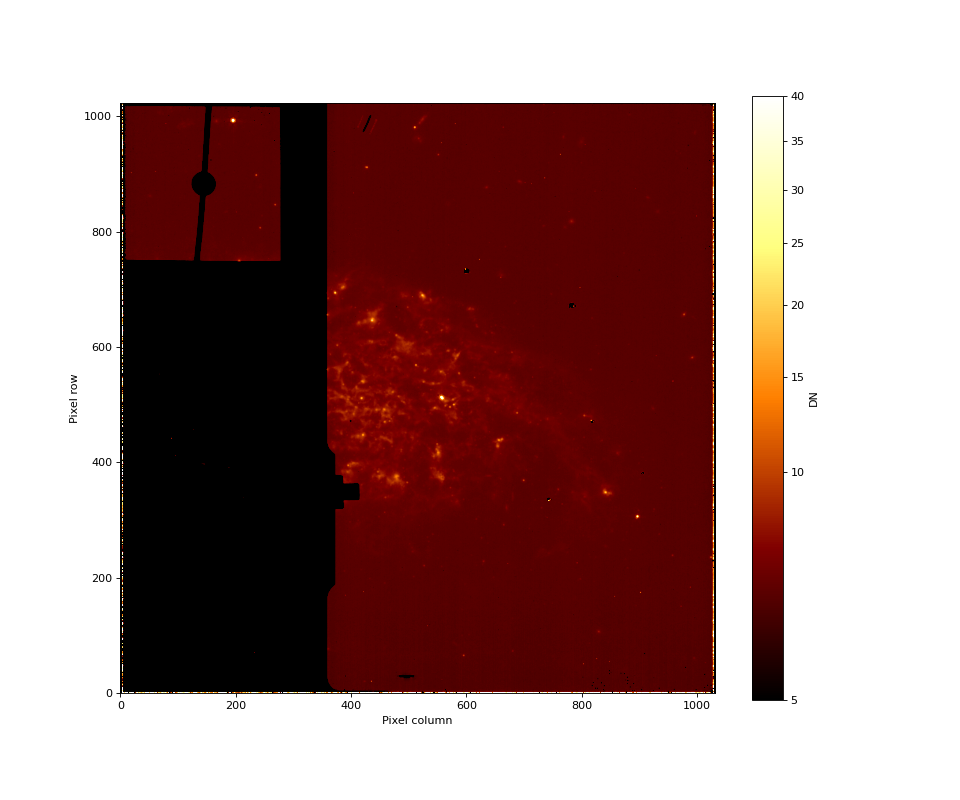

In [18]:
drange = drange_cal
# look at one of the images
miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_cal.fits")
miri_cal = datamodels.open(miri_cal_files[0])
show_image(miri_cal.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

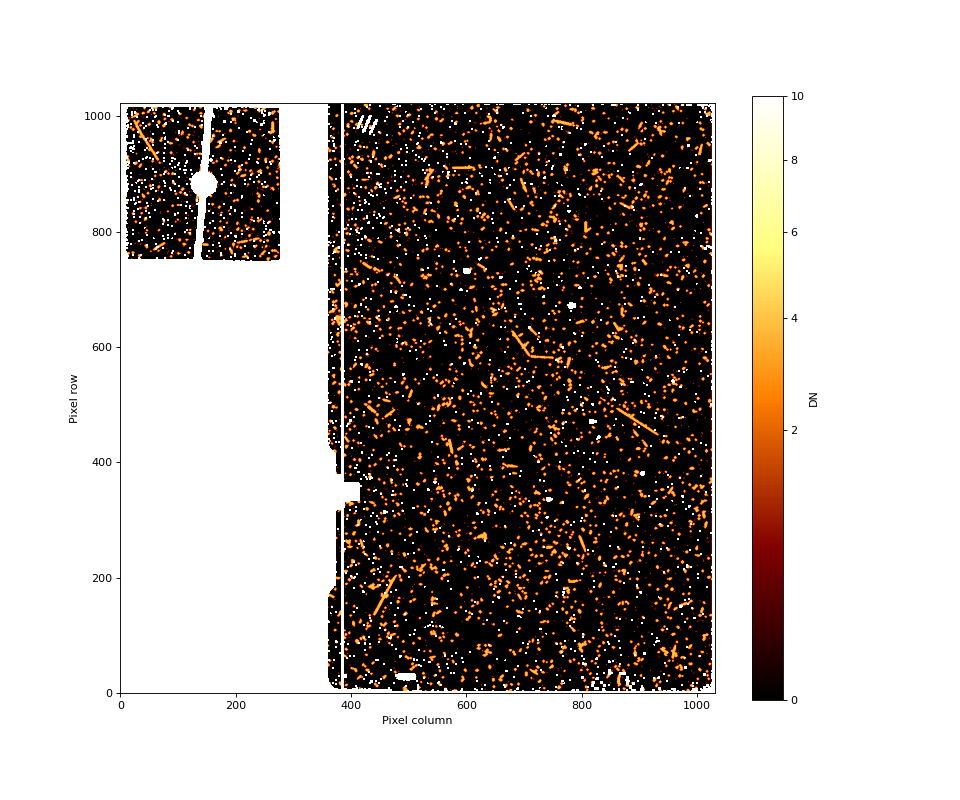

In [19]:
show_image(miri_cal.dq, 0, 10, dmap=dmap)

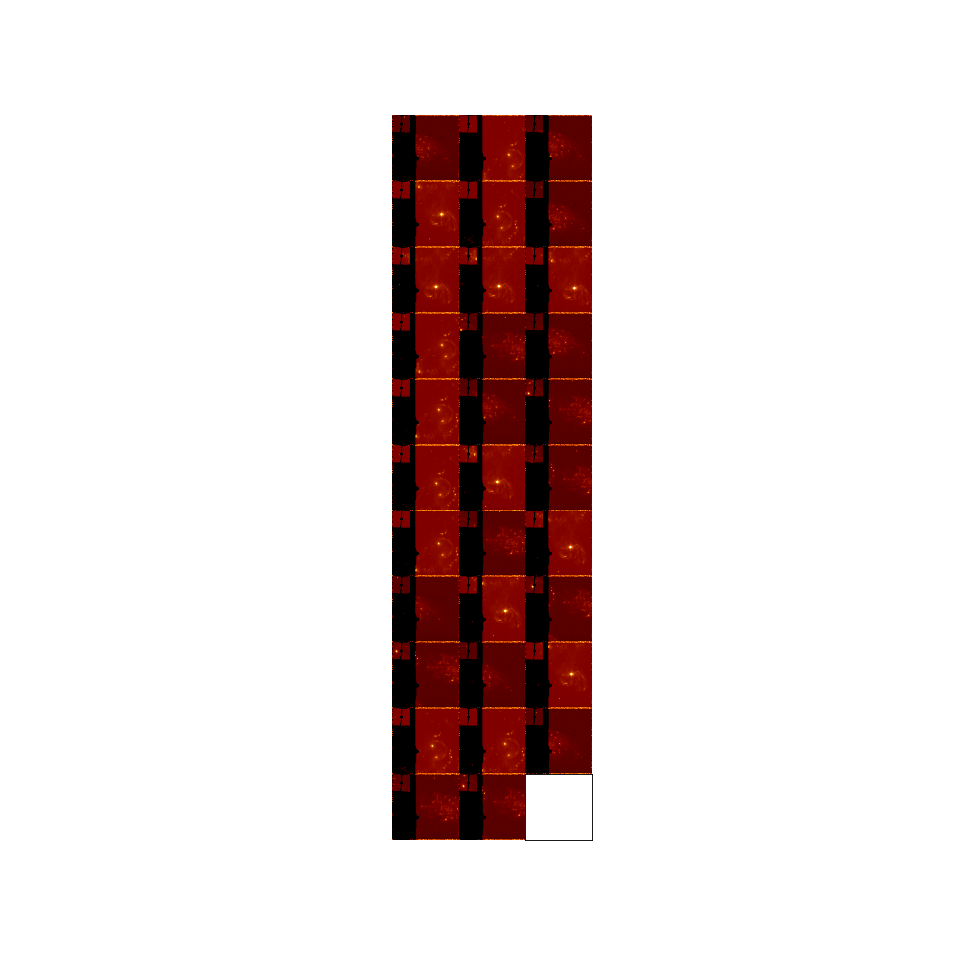

In [20]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_cal_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_cal_files):
    with datamodels.open(cfile) as miri_cal:
        cimage = miri_cal.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE3

In [21]:
# update the WCS for mosaic tile 1
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}2001*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile1_shifts)

# update the WCS for mosaic tile 2
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}2002*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile2_shifts)
    
# update the WCS for mosaic tile 3
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}6001*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile3_shifts)
    
# update the WCS for mosaic tile 4
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}6002*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile4_shifts)

In [22]:
miri_cal_files = glob.glob(f"./{filter}/stage2/j*ge_fixed_wcs_cal.fits")
output_dir = f"./{filter}/stage3/"
print(miri_cal_files)

if rotation is not None:
    miri_asn_name = f'miri_{filter}_stage3_fixedrot_asn'
else: 
    miri_asn_name = f'miri_{filter}_stage3_asn'
miri_asn = asn_from_list.asn_from_list(miri_cal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

miri_asn_file = f'{miri_asn_name}.json'
with open(miri_asn_file, 'w') as outfile:
    name, serialized = miri_asn.dump(format='json')
    outfile.write(serialized)
    
print(miri_asn_file)

['./F770W/stage2/jw02732002002_02101_00003_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02732002002_02101_00002_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02732006002_02101_00006_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02732002002_02101_00007_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02732006002_02101_00007_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02732002002_02101_00005_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02732002002_02101_00004_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02732006001_02101_00004_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02732002001_02101_00007_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02732006002_02101_00001_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02732002002_02101_00001_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02732006002_02101_00008_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02732006001_02101_00007_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02732002001_02101_00003_mirimage_fixed_wcs_ca

In [23]:
if run_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg, 
                crval=crval, rotation=rotation, 
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-08-03 13:09:39,057 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-08-03 13:09:39,058 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-08-03 13:09:39,058 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-08-03 13:09:39,060 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_re

2022-08-03 13:09:39,912 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-08-03 13:09:39,913 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-08-03 13:09:48,297 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-08-03 13:09:48,298 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.2, 'snr_threshold': 5, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 5, 'searchrad': 5.0, 'use2dhist': True, 'separation': 1.0, 'tolerance': 0.7, 'xoffset': 

2022-08-03 13:12:11,198 - stpipe.Image3Pipeline.skymatch - INFO -  
2022-08-03 13:12:11,318 - stpipe.Image3Pipeline.skymatch - INFO - Step skymatch done
2022-08-03 13:12:11,827 - stpipe.Image3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<ModelContainer>,).
2022-08-03 13:12:11,829 - stpipe.Image3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'crf', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}
2022-08-03 13:12:11,843 - s

2022-08-03 13:13:27,545 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1978, 2385)
2022-08-03 13:13:28,653 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1978, 2385)
2022-08-03 13:13:29,579 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1978, 2385)
2022-08-03 13:13:29,629 - stpipe.Image3Pipeline.outlier_detection - INFO - Flagging outliers
2022-08-03 13:13:29,756 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 1683 (0.16%)
2022-08-03 13:13:29,895 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 1972 (0.19%)
2022-08-03 13:13:30,034 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 1824 (0.17%)
2022-08-03 13:13:30,171 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 2206 (0.21%)
2022-08-03 13:13:30,301 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels

2022-08-03 13:14:00,264 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02732002001_02101_00006_mirimage_fixed_wcs_a3001_crf.fits
2022-08-03 13:14:01,345 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02732006001_02101_00005_mirimage_fixed_wcs_a3001_crf.fits
2022-08-03 13:14:02,375 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02732006002_02101_00005_mirimage_fixed_wcs_a3001_crf.fits
2022-08-03 13:14:03,395 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02732006001_02101_00001_mirimage_fixed_wcs_a3001_crf.fits
2022-08-03 13:14:04,386 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02732006001_02101_00002_mirimage_fixed_wcs_a3001_crf.fits
2022-08-03 13:14:05,360 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02732006002_02101_00004_mirimage_fixed_wcs_a3001_crf.fits
2022-08-03

2022-08-03 13:15:02,751 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1995, 2405)
2022-08-03 13:15:03,762 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1995, 2405)
2022-08-03 13:15:04,747 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1995, 2405)
2022-08-03 13:15:05,770 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1995, 2405)
2022-08-03 13:15:06,737 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1995, 2405)
2022-08-03 13:15:07,761 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1995, 2405)
2022-08-03 13:15:08,762 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1995, 2405)
2022-08-03 13:15:09,757 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1995, 2405)
2022-08-03 13:15:10,789 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1995, 2405)
2022-08-03 13:15:11,826 - stpipe.Image3Pipelin

2022-08-03 13:16:20,249 - stpipe.Image3Pipeline.resample - INFO - Saved model in ./F770W/stage3/miri_F770W_stage3_asn_i2d.fits
2022-08-03 13:16:20,250 - stpipe.Image3Pipeline.resample - INFO - Step resample done
2022-08-03 13:16:20,641 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog running with args (<ImageModel(1995, 2405) from miri_F770W_stage3_asn_i2d.fits>,).
2022-08-03 13:16:20,642 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'cat', 'search_output_file': True, 'input_dir': '', 'bkg_boxsize': 1000, 'kernel_fwhm': 2.0, 'snr_threshold': 5, 'npixels': 25, 'deblend': False, 'aperture_ee1': 30, 'aperture_ee2': 50, 'aperture_ee3': 70, 'ci1_star_threshold': 2.0, 'ci2_star_threshold': 1.8}
2022-08-03 13:16:20,661 - stpipe.Image3Pipeli

In [24]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_catalog_file = output_dir + miri_asn_name + '_cat.ecsv'

In [25]:
# Open the mosaic image
miri_mosaic = datamodels.open(miri_mosaic_file)

In [26]:
# Read in the source catalog
miri_source_cat = ascii.read(miri_catalog_file)

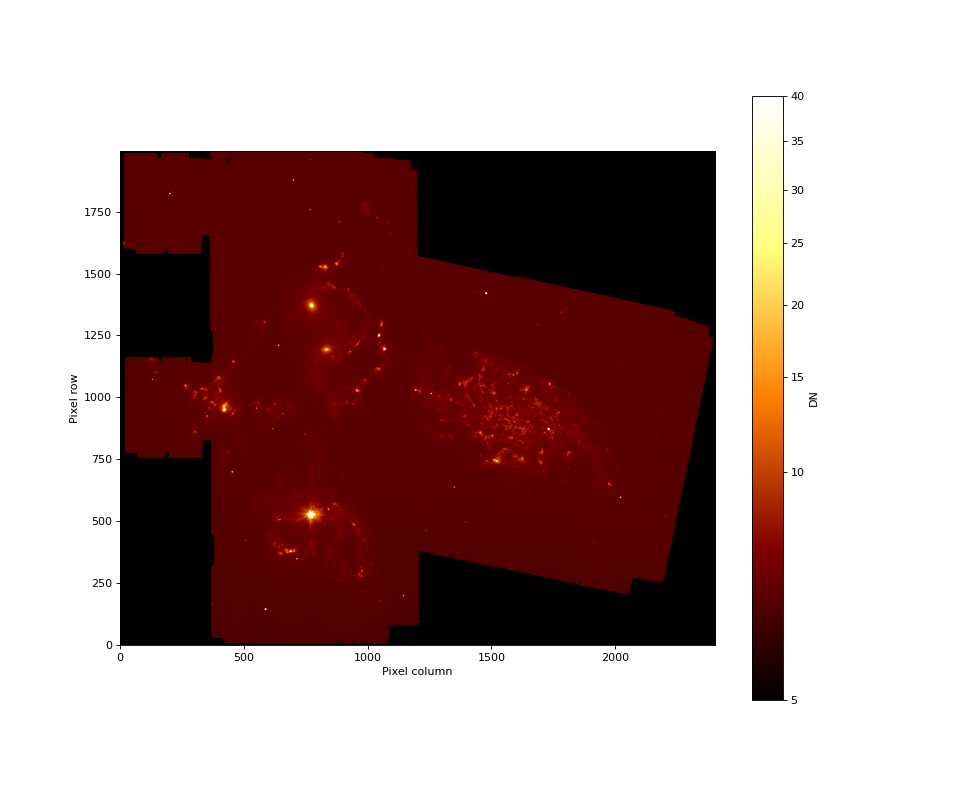

In [27]:
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

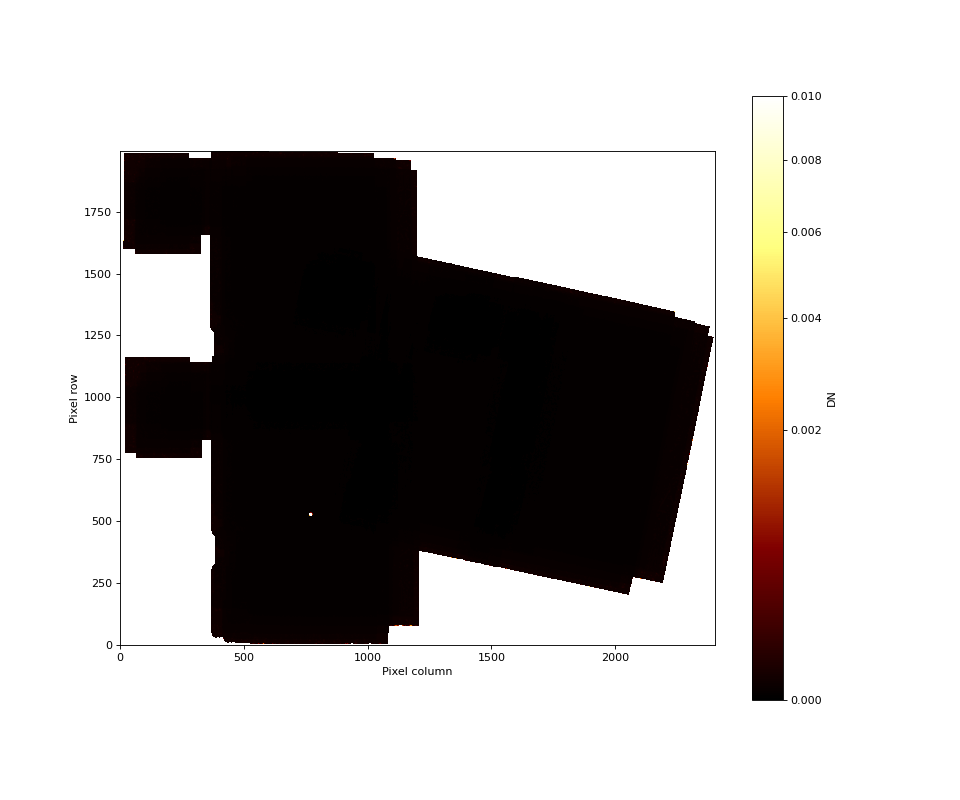

In [28]:
# Look at the mosaic data read noise uncertainties (i.e., coverage map)
show_image(miri_mosaic.var_rnoise, vmin=0.0, vmax=0.01, dmap=dmap)

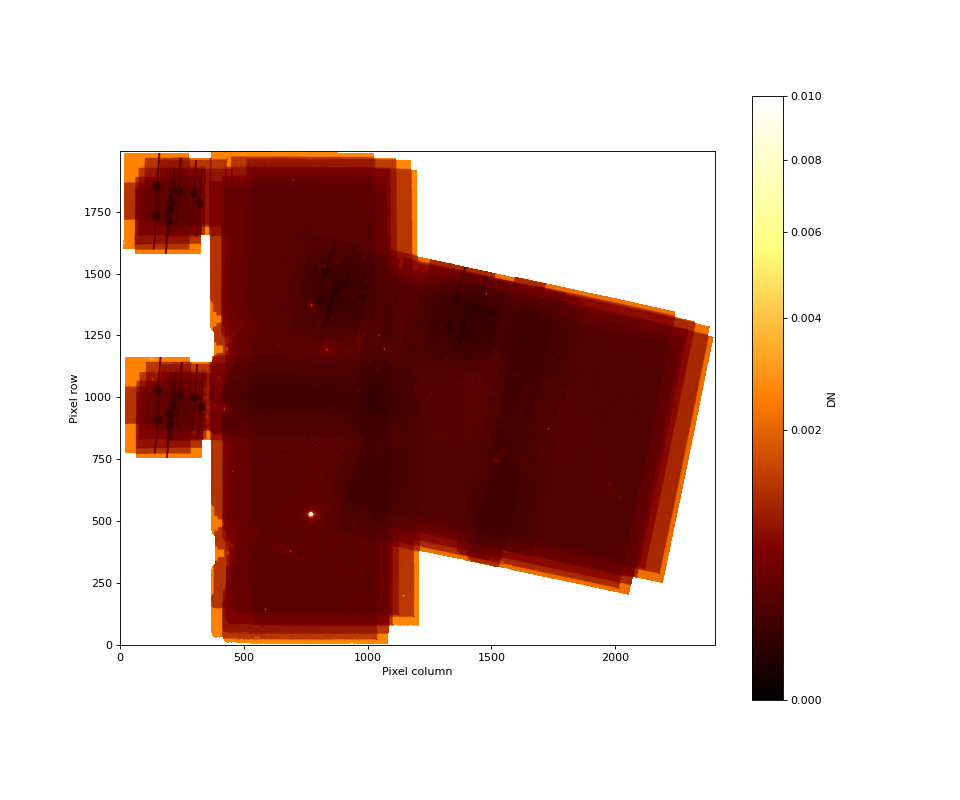

In [29]:
# Look at the mosaic data poisson uncertainties
show_image(miri_mosaic.var_poisson, vmin=0, vmax=0.01, dmap=dmap)

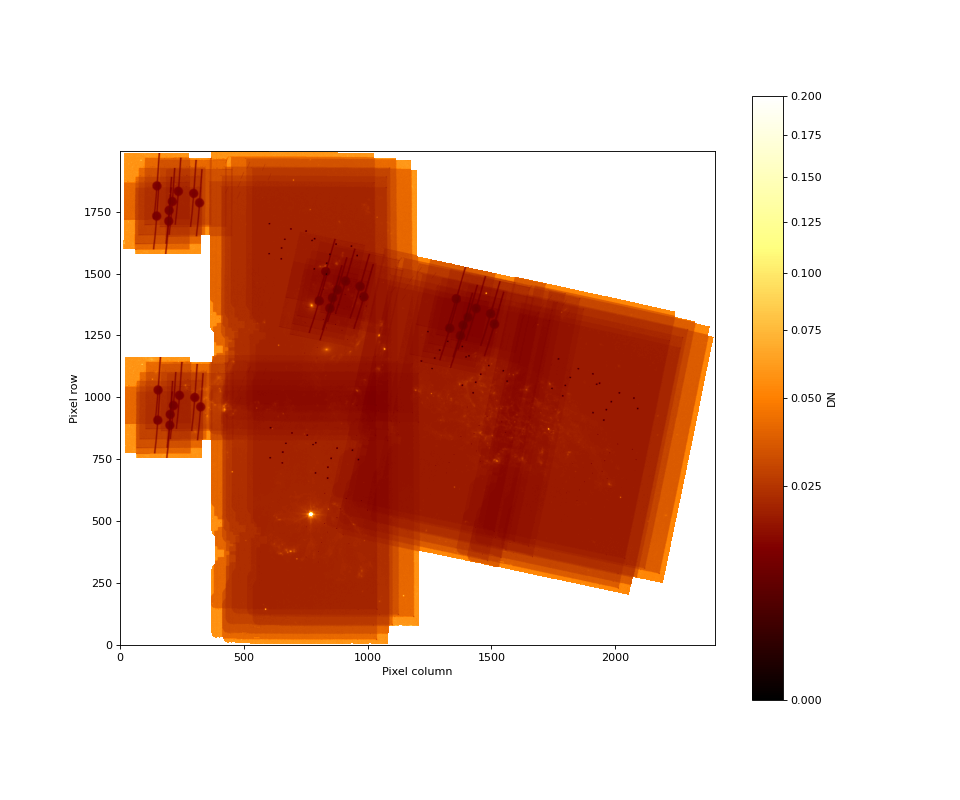

In [30]:
# Look at the mosaic total data uncertainties
show_image(miri_mosaic.err, vmin=0, vmax=0.2, dmap=dmap)

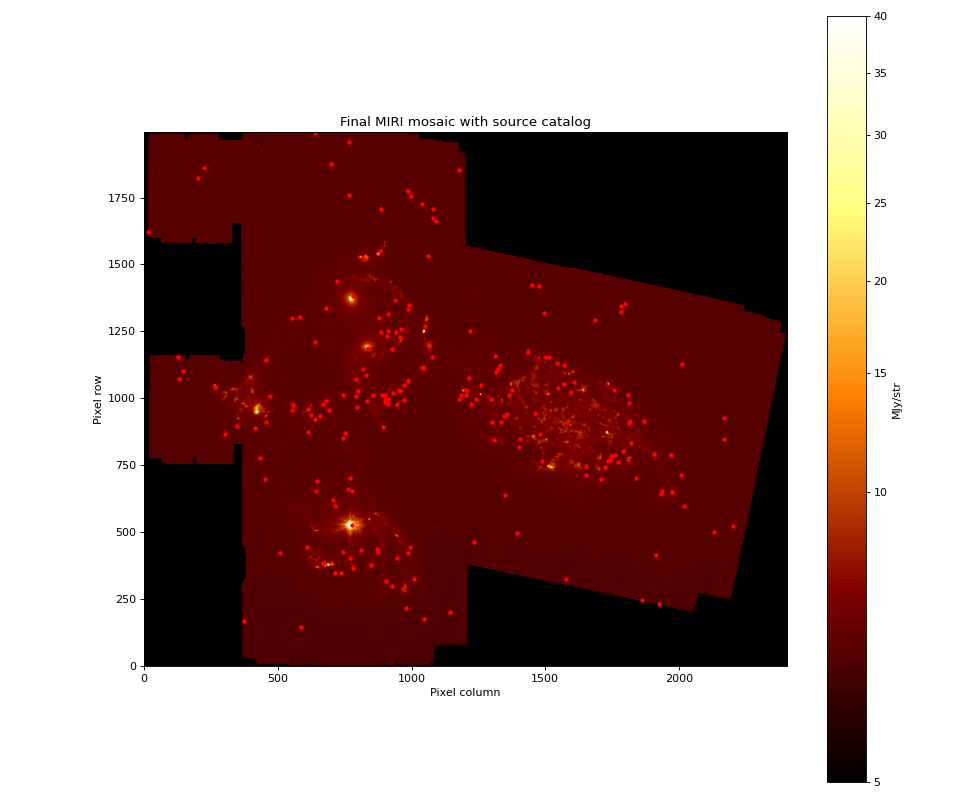

In [31]:
# Show the catalog sources on the mosaic
overlay_catalog(miri_mosaic.data, miri_source_cat, flux_limit=5e-7, vmin=drange[0], vmax=drange[1],
                title='Final MIRI mosaic with source catalog', dmap=dmap)